# Project 3
## An analysis of the Twitter of politicians - Part 1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
import string
import shelve
from datetime import datetime
from p3funcs import *

In [2]:
#Read the data into the notebook
Obama_raw = pd.read_csv('data/BarackObama.csv', encoding='latin-1')
Trump_raw = pd.read_csv('data/realDonaldTrump.csv', encoding='latin-1')

First we inspect how the dataframe looks like:

In [3]:
Obama_raw.head(3)

,created_at,text,url,replies,retweets,favorites,user
0,10/16/17 22:59,I'm grateful to @SenJohnMcCain for his lifetim...,https://twitter.com/BarackObama/status/9200615...,17064,89916,641842,BarackObama
1,10/2/17 12:41,Michelle &amp; I are praying for the victims i...,https://twitter.com/BarackObama/status/9148326...,21588,405895,1715753,BarackObama
2,9/30/17 2:22,Proud to cheer on Team USA at the Invictus Gam...,https://twitter.com/BarackObama/status/9139520...,8476,60651,503255,BarackObama


In [4]:
Trump_raw.head(3)

,created_at,text,url,replies,retweets,favorites,user
0,10/23/17 12:30,I had a very respectful conversation with the ...,https://twitter.com/realDonaldTrump/status/922...,46228,10243,49468,realDonaldTrump
1,10/23/17 11:53,Two dozen NFL players continue to kneel during...,https://twitter.com/realDonaldTrump/status/922...,31419,14006,62406,realDonaldTrump
2,10/23/17 11:42,There will be NO change to your 401(k). This h...,https://twitter.com/realDonaldTrump/status/922...,9552,13719,62662,realDonaldTrump


Next we want to see the monthly twitter distribution of each dataframe and we want to extract all the month values from the dataframes first.

In [5]:
##First we want to see the three dataframes have same time domain
obama_day = [datetime.strptime(Obama_raw.created_at[i], '%m/%d/%y %H:%M') for i in range(len(Obama_raw.created_at))]
Obama_raw.created_at = obama_day

trump_day = [datetime.strptime(Trump_raw.created_at[i], '%m/%d/%y %H:%M') for i in range(len(Trump_raw.created_at))]
Trump_raw.created_at = trump_day

print('Frist day of Trump Tweeting is:',sorted(trump_day)[0], 'and the last twitter from Trump in the dataframe is', sorted(trump_day)[-1])
print('Frist day of Obama Tweeting is',sorted(obama_day)[0], 'and the last twitter from Obama in the dataframe is', sorted(obama_day)[-1])

Frist day of Trump Tweeting is: 2016-08-24 15:19:00 and the last twitter from Trump in the dataframe is 2017-10-23 12:30:00
Frist day of Obama Tweeting is 2014-08-14 16:50:00 and the last twitter from Obama in the dataframe is 2017-10-16 22:59:00


**We see that they have differenct time domains, so we decided just to use the data for whole year. For example, Trump first tweets at 2016-08-24 and the ends at 2017-10-23, so we extract data from 2016-08-24 to 2017-08-24 to make it whole year. And we do the same for Obama.** 

In [6]:
##now we refine them into whole year time domain.
obama= Obama_raw[Obama_raw.created_at <= '2017-08-14 15:19:00'].reset_index().drop(['index'], axis = 1)
trump = Trump_raw[Trump_raw.created_at <= '2017-08-24 16:50:00'].reset_index().drop(['index'], axis = 1)

#get the tweeting frequency for each month
obama_month = get_month(obama.created_at)
obama_summaried_month = dict((x,obama_month.count(x)) for x in set(obama_month))

trump_month = get_month(trump.created_at)
trump_summaried_month = dict((x,trump_month.count(x)) for x in set(trump_month))
trump_summaried_month

{1: 212,
 2: 147,
 3: 143,
 4: 150,
 5: 146,
 6: 208,
 7: 242,
 8: 271,
 9: 296,
 10: 530,
 11: 192,
 12: 137}

We build a function that can transform the month value into proper style:

In [7]:
trump_month_distri = pd.DataFrame(list(trump_summaried_month.items()), index = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]).drop([0], axis=1).iloc[:,0]
obama_month_distri = pd.DataFrame(list(obama_summaried_month.items()), index = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]).drop([0], axis=1).iloc[:,0]
trump_month_distri

January      212
February     147
March        143
April        150
May          146
June         208
July         242
August       271
September    296
October      530
November     192
December     137
Name: 1, dtype: int64

Now we plot them as we did in project 2 and see how different they look:

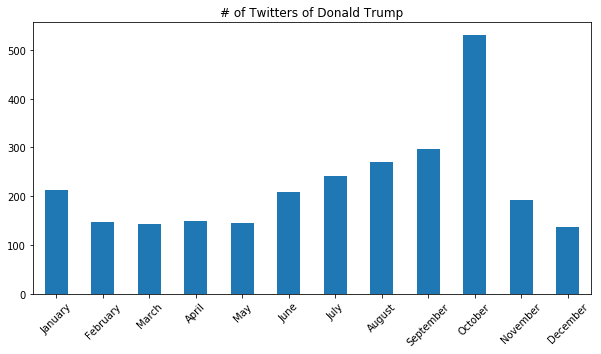

In [8]:
# And this is a plot of these:
trump_month_distri.plot(kind='bar', figsize=(10,5), rot= 45,title="# of Twitters of Donald Trump")
plt.savefig('fig/trump_month.png');

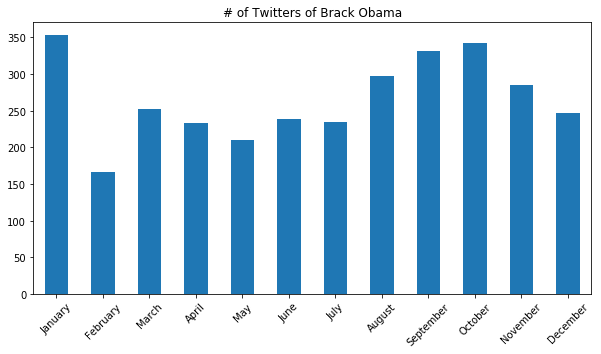

In [9]:
obama_month_distri.plot(kind='bar', figsize=(10,5), rot= 45,title="# of Twitters of Brack Obama")
plt.savefig('fig/obama_month.png');

The United States presidential election of 2016 was the 58th quadrennial American presidential election, held on Tuesday, November 8, 2016. In addition, the number of Twitters of Donald Trump in October is much more than the other month. It seems the political events would influence the number of Twitters for Donald Trump. And for Brack Obama, there is no any month that the number of Twitters is much more than the other month. 

Next, we want to see how the popular trends for both Barack Obama and Donald Trump when they are as president:

In [10]:
trep = pd.Series(data=trump['replies'].values, index=trump.created_at)
tfav = pd.Series(data=trump['favorites'].values, index=trump.created_at)
tret = pd.Series(data=trump['retweets'].values, index=trump.created_at)

orep = pd.Series(data=obama['replies'].values, index=obama.created_at)
ofav = pd.Series(data=obama['favorites'].values, index=obama.created_at)
oret = pd.Series(data=obama['retweets'].values, index=obama.created_at)

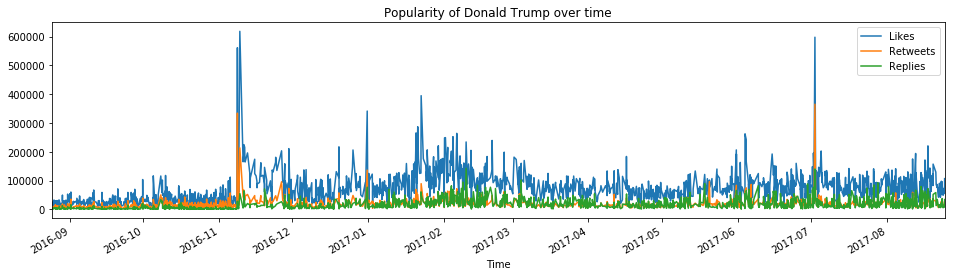

In [11]:
tfav.plot(figsize=(16,4), label="Likes", legend=True,title="Popularity of Donald Trump over time")
tret.plot(label="Retweets", legend=True)
trep.plot(label="Replies", legend=True)
plt.xlabel('Time')
plt.savefig("fig/trump_popularity_time.png");

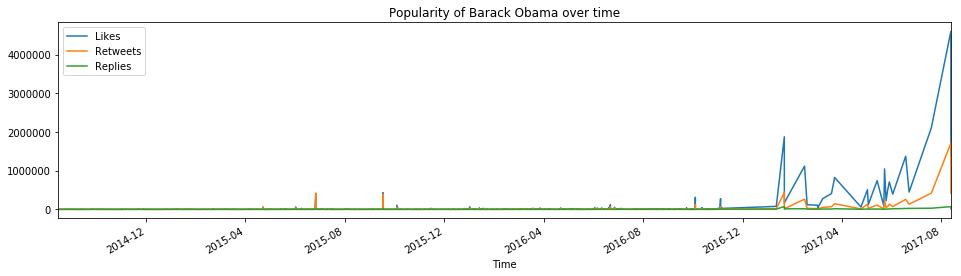

In [12]:
ofav.plot(figsize=(16,4), label="Likes", legend=True,title="Popularity of Barack Obama over time")
oret.plot(label="Retweets", legend=True)
orep.plot(label="Replies", legend=True)
plt.xlabel('Time')
plt.savefig("fig/obama_popularity_time.png");

What can you say about these two graphs?

As we can see, the popularity of Donald Trump is much more than Barack Obama's. Or we can say, the tweets posted by Donald Trump raised more concerns. At first, we thought it may be the Twitter users is not that much 3 years ago. However, it makes no differences for the amount of Twitter users between right now and 3 years ago. It is easy to find the data with google search for that know how many Twitter users in the past 5 years. 
Then, we would like to see which tweet got many likes, retweets and replies, such as the tweets of Mr. Obama from 2016-12 to 2017-08, and the tweets of Mr. Trump in 2016-11 and 2017-07. Since the United States presidential election of 2016 was in November, 2016, we could know it's the reason why Mr. Trump's tweet got many attentions. 

In [13]:
with shelve.open('result/vars1') as db:
    db['obama'] = Obama_raw[['created_at', 'text']]
    db['trump'] = Trump_raw[['created_at', 'text']]
    db['obama_raw'] = Obama_raw[['created_at', 'text','replies', 'retweets', 'favorites']]
    db['trump_raw'] = Trump_raw[['created_at', 'text','replies', 'retweets', 'favorites']]